# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Angela Halsten
Git: https://github.com/alhalsten/Module7

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

                    Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [57]:
import requests
from bs4 import BeautifulSoup

parser = 'html.parser'
article_page = requests.get('https://www.edutopia.org/article/are-we-teaching-math-kids-need/')
article_html = article_page.text

# pickle works similar to json, but stores information in a binary format
# json files are readable by humans, pickle files, not so much

# BeautifulSoup objects don't pickle well, so it's appropriate and polite to web developers to cache the text of the web page, or just dump it to an html file you can read in later as a regular file
import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

                Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [58]:
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
print(article_element.get_text())

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

doc = nlp(article_element.get_text())
doc._.blob.polarity                            
doc._.blob.subjectivity                        
doc._.blob.sentiment_assessments.assessments   
doc._.blob.ngrams() 
print("Polarity is ", doc._.blob.polarity)

STEMAre We Teaching the Math Kids Need?Every child possesses vast mathematics potential, says Jo Boaler, Stanford University mathematics professor and best-selling author—but for them to access it, we need to rethink how we teach math.
By Sarah GonserJanuary 29, 2021Jo Boaler has spent a lot of time thinking and writing about anxiety—math anxiety, in particular—and its impact on kids’ learning trajectories.Mathematics, she writes in her 2019 book, Limitless Mind: Learn, Lead, and Live Without Barriers, is the subject “with the most damaging ideas held by teachers, students, and parents.” It’s one of the few academic subjects in which multitudes of students, early on, decide they’re not cut out for it: We’re either a “math person” or we’re not. That notion tends to stick well into adulthood. “It is difficult to know how many people walk around in society harboring damaging ideas about their math ability, but I estimate it to be at least half of the population,” she writes.Boaler, a prof

                    Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [59]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = spacy.load('en_core_web_sm')
# why not, let's add some fun sentiment analysis, because we can
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)

def we_care_about(token):
    return not (token.is_space or token.is_punct)

interesting_tokens = [token for token in doc if we_care_about(token)]

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print("(word, occurrences)",word_freq.most_common(5))

(word, occurrences) [('kids', 25), ('math', 17), ('data', 13), ('science', 10), ('school', 9)]


                    Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [60]:
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print("(word, occurrences)",lemma_freq.most_common(5))

(word, occurrences) [('kid', 30), ('math', 25), ('change', 17), ('teach', 11), ('science', 10)]


                Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0, 0.5, 'Sentences')

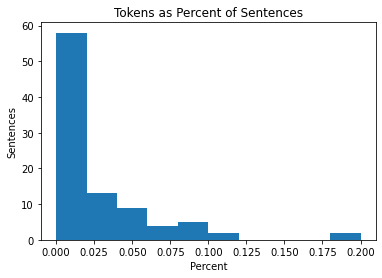

In [61]:
cool_words = set()
tokenpercentlist = []
for token, freq in word_freq.most_common(5):
    cool_words.add(token)
def score_sentence_by_token(sentence, interesting_token):
    
    sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
for sentence in sentences:
    count1 = 0
    count2=0
    for token in sentence:
        if token.lemma_.lower() in cool_words:
            count1 += 1
    # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
        if not(token.is_space or token.is_punct):
            count2 += 1
            tokenpercent = count1/count2  
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    tokenpercentlist.append(tokenpercent)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.hist(tokenpercentlist)
plt.title('Tokens as Percent of Sentences')
plt.xlabel('Percent')
plt.ylabel('Sentences')

The most common range is 0.0-0.025.

                Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0, 0.5, 'Sentences')

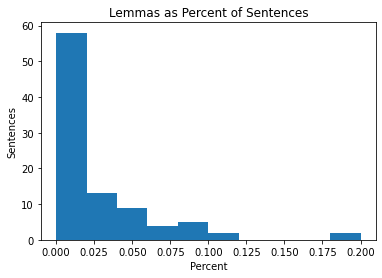

In [62]:
cool_words = set()
lemmapercentlist = []
for lemma, freq in word_freq.most_common(5):
    cool_words.add(lemma)
def score_sentence_by_lemma(sentence, interesting_lemma):
    
    sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
for sentence in sentences:
    count1 = 0
    count2=0
    for lemma in sentence:
        if lemma.lemma_.lower() in cool_words:
            count1 += 1
    # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
            lemmapercent = count1/count2  
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    lemmapercentlist.append(lemmapercent)
  
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.hist(lemmapercentlist)
plt.title('Lemmas as Percent of Sentences')
plt.xlabel('Percent')
plt.ylabel('Sentences')

The most common percent range is 0.0-0.025.

                    Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.06
* Cutoff Score (lemmas): 0.06

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

                    Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [118]:
cool_words = set()

for token, freq in word_freq.most_common(5):
    cool_words.add(token)
def score_sentence_by_token(sentence, interesting_token):
    
    sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
for sentence in sentences:
    count1 = 0
    count2=0
    for token in sentence:
        if token.lemma_.lower() in cool_words:
            count1 += 1
    # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
        if not(token.is_space or token.is_punct):
            count2 += 1
            tokenpercent = count1/count2  
    sent = str(sentence).replace('\n','').replace('  ',' ')
   
    if tokenpercent > 0.05: 
        sentences_list = [sent.text.strip() for sent in doc.sents] 
        minidoc = nlp(''.join(sent))
        
        print(minidoc)

STEMAre We Teaching the Math Kids Need?Every child possesses vast mathematics potential, says Jo Boaler, Stanford University mathematics professor and best-selling author—but for them to access it, we need to rethink how we teach math.
She’s a vocal proponent of changing the way we assess mathematics and modernizing the math curriculum—especially in high school—so that it’s more engaging, more inclusive, and more likely to prepare kids for the modern workforce.
Finally, we have stereotyped ideas about who can be good at maths.
The content we teach in maths was created around the 1800s and really hasn’t changed since then.
So I’m very excited about bringing data science into mathematics.
I am one of the five writers of a new framework in California where we are highlighting data science as a really important part of maths.
Now, it’s hard to do that because the Common Core Standards really didn’t include data science, and they need to be updated.
But what we’ve done is try and bring a da

                    Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [119]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

doc = nlp(minidoc)
doc._.blob.polarity                            
doc._.blob.subjectivity                        
doc._.blob.sentiment_assessments.assessments   
doc._.blob.ngrams() 


print("Polarity is ", doc._.blob.polarity)
print(len(minidoc))

Polarity is  0.25
18


                    Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [105]:
cool_words = set()

for lemma, freq in word_freq.most_common(5):
    cool_words.add(lemma)
def score_sentence_by_lemma(sentence, interesting_lemma):
    
    sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
for sentence in sentences:
    count1 = 0
    count2=0
    for lemma in sentence:
        if lemma.lemma_.lower() in cool_words:
            count1 += 1
    # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
            lemmapercent = count1/count2  
    sent = str(sentence).replace('\n','').replace('  ',' ')
   
    if lemmapercent > 0.05: 
        sentences_list = [sent.text.strip() for sent in doc.sents] 
        minidoc_lemma = nlp(''.join(sent))
        
        print(minidoc_lemma)

STEMAre We Teaching the Math Kids Need?Every child possesses vast mathematics potential, says Jo Boaler, Stanford University mathematics professor and best-selling author—but for them to access it, we need to rethink how we teach math.
She’s a vocal proponent of changing the way we assess mathematics and modernizing the math curriculum—especially in high school—so that it’s more engaging, more inclusive, and more likely to prepare kids for the modern workforce.
Finally, we have stereotyped ideas about who can be good at maths.
The content we teach in maths was created around the 1800s and really hasn’t changed since then.
So I’m very excited about bringing data science into mathematics.
I am one of the five writers of a new framework in California where we are highlighting data science as a really important part of maths.
Now, it’s hard to do that because the Common Core Standards really didn’t include data science, and they need to be updated.
But what we’ve done is try and bring a da

                    Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [106]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

doc = nlp(minidoc_lemma)
doc._.blob.polarity                            
doc._.blob.subjectivity                        
doc._.blob.sentiment_assessments.assessments   
doc._.blob.ngrams() 


print("Polarity is ", doc._.blob.polarity)
print(len(minidoc_lemma))

Polarity is  0.25
18


                    Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  
    The polarity scores of the summaries are both 0.25 whereas, the polarity of the original article is 0.15. So, there is a slight difference between the summaries and the original article. However, they both have a slight positive polarity. This may be because the summaries come from the same article and have the same kind of tone as the rest of the article. 

                Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?
    Both of my summaries were the same. The only difference in the top five words was data and change. But these sentences also included the popular word "kid" so the sentences showed up in both summaries. So, there is no preference for me between the two summaries. 